### Problema 1

In [4]:
from cmath import e, exp, acos
import numpy

alpha=5
beta=5

r=numpy.sqrt(alpha**2+beta**2)
theta=acos(alpha/r)
z=r*e**(1j*theta)
z

(5.000000000000001+5.000000000000001j)

### Problema 2

In [5]:
v_0=2
v_f=5
a=3

x_f=(v_f**2-v_0**2)/(2*a)
x_f

3.5

### Problema 3

In [6]:
## modulo gaussElimin
'''
x = gaussElimin(a,b).
Resuelve [a]{x} = {b} por metodo eliminacion de Gauss.
'''
import numpy as np

a = np.array([[2.0, 3.0, 2.0], [1.0, 3.0, 2.0], [1.0, 1.0, 1.0]])
b = np.array([[27.0], [22.0], [12.0]])
n = len(b)

def gaussElimin(a,b):
  n = len(b)
  # Fase de eliminacion
  for k in range(0,n-1):
    for i in range(k+1,n):
      if a[i,k] != 0.0:
        lam = a [i,k]/a[k,k]
        a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
        b[i] = b[i] - lam*b[k]
  # Fase de sustitucion hacia atras
  for k in range(n-1,-1,-1):
    b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
  return b

In [7]:
x = gaussElimin(a,b)
print(x)

[[5.]
 [3.]
 [4.]]


### Problema 4

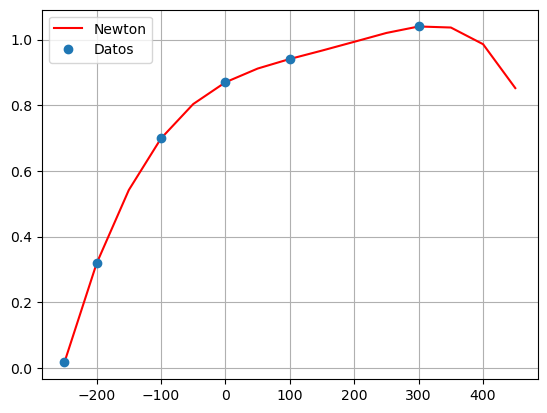

  x        yInt      
---------------------
 -250.0    0.01630000
 -200.0    0.31800000
 -150.0    0.54165994
 -100.0    0.69900000
 -50.0    0.80366807
 0.0    0.87000000
 50.0    0.91177983
 100.0    0.94100000
 150.0    0.96662159
 200.0    0.99333455
 250.0    1.02031790
 300.0    1.04000000
 350.0    1.03681875
 400.0    0.98598182
 450.0    0.85222688


In [13]:
# Método de interpolación de Newton


def evalPoly(a, xData, x):  # Función que evalua polinomios de Lagrange
    n = len(xData) - 1  # Grado del polinomio
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - xData[n - k]) * p
    return p

# Ejemplo método de Newton
def coeffts(xData, yData):
    m = len(xData)  # Número de datos
    a = yData.copy()
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1]) / (xData[k:m] - xData[k - 1])
    return a
import numpy as np
import matplotlib.pyplot as plt
from math import *

xData = np.array([-250.0, -200.0, -100.0, 0.0, 100.0, 300.0])
yData = np.array([0.0163, 0.318, 0.699, 0.870, 0.941, 1.04])
coeff = coeffts(xData, yData)
x = np.arange(-250.0, 500.0, 50.0)
plt.plot(x, evalPoly(coeff, xData, x), "r", label="Newton")
plt.plot(xData, yData, "o", label="Datos")
plt.legend()
plt.grid()
plt.show()
print("  x        yInt      ")
print("---------------------")
for i in range(len(x)):
    y = evalPoly(coeff, xData, x[i])
    #yExacta = 4.8 * cos(pi * x[i] / 20)
    #Error = abs(((yExacta - y) / yExacta) * 100)
    print(" %.1f    %.8f" % (x[i], y))